**Dogs image classifier with fastai**

Fastai is a deep learning library which provides practitioners with high-level components that can quickly and easily provide state-of-the-art results in standard deep learning domains, and provides researchers with low-level components that can be mixed and matched to build new approaches. It aims to do both things without substantial compromises in ease of use, flexibility, or performance. 

For the images I used an extention of Google Chrome called :"fatkun" to download images directly from Google Images.
I then cleaned downloaded to have pertinent images tu use.

In [ ]:
#Installing the right version of pytorch and Import dependencies
!pip install "torch==1.4" "torchvision==0.5.0"
from  google.colab import drive
from fastai.vision import *

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 41.5MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [ ]:
# Connect workbook to google drive folder to access images 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
root_path = 'gdrive/My Drive/AI_Projects/'

In [ ]:
#Making the folder for the dogs images
#(Path(root_path)/'dogs').mkdir(parents=True, exist_ok=True)

In [ ]:
proj_path = 'gdrive/My Drive/AI_Projects/dogs/'

In [ ]:
#Folders for the dogs images
folders = ['alaskan malamute','doberman','bulldog','caniche','chihuahua','labrador','berger allemand','dalmatien','shibainu','bull terrier','mastiff tibétain','pug','beagle','rottweiler','whippet']

In [ ]:
#Creating the folders 
#Once the folders were created on the drive I put the pictures downloaded in each folder
#for i in folders:
  #path = Path(proj_path)
  #dest = (path/i).mkdir(parents=True, exist_ok=True)

In [ ]:
p_path = Path(proj_path)

In [ ]:
#Creating image data 80/20 train test split 
#Transforming the data and normalizing it
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['alaskan malamute',
 'beagle',
 'berger allemand',
 'bull terrier',
 'bulldog',
 'caniche',
 'chihuahua',
 'dalmatien',
 'doberman',
 'labrador',
 'mastiff tibétain',
 'pug',
 'rottweiler',
 'shibainu',
 'whippet']

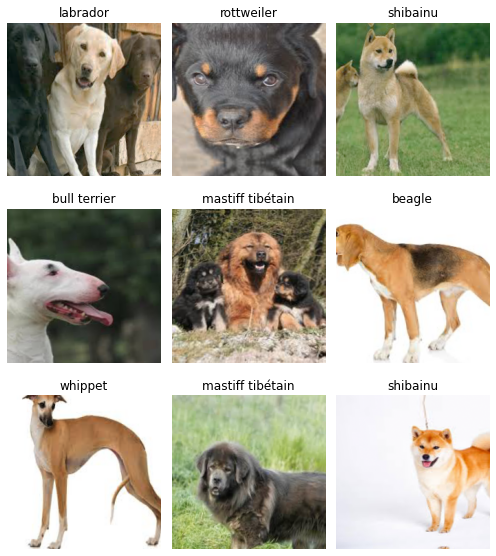

In [ ]:
data.show_batch(rows=3,figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['alaskan malamute',
  'beagle',
  'berger allemand',
  'bull terrier',
  'bulldog',
  'caniche',
  'chihuahua',
  'dalmatien',
  'doberman',
  'labrador',
  'mastiff tibétain',
  'pug',
  'rottweiler',
  'shibainu',
  'whippet'],
 15,
 649,
 162)

In [ ]:
#create cnn_learner object
#use model resnet 34 for transfer learning 
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
# train 8 epochs of the model 
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,3.338809,0.987025,0.265432,01:55
1,1.895816,0.178441,0.043210,00:08
2,1.228043,0.169581,0.037037,00:08
3,0.866112,0.165024,0.049383,00:08
4,0.647282,0.175930,0.043210,00:08
5,0.501955,0.186499,0.037037,00:08
6,0.401966,0.189678,0.049383,00:08
7,0.323311,0.188310,0.049383,00:08


In [ ]:
learn.save('model1_34', return_path=True)

PosixPath('gdrive/My Drive/AI_Projects/dogs/models/model1_34.pth')

In [ ]:
#Unfreezing the model to try to make it better
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


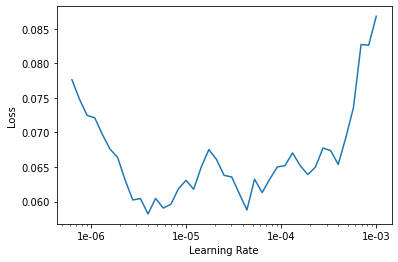

In [ ]:
#Looking for the optimal learning rate
learn.lr_find()
learn.recorder.plot()

In [ ]:
#We look for the steep drops and try to make them better, here we have one at 1e-06
learn.fit_one_cycle(2, max_lr=slice(1e-6), wd=.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.042644,0.189071,0.049383,00:08
1,0.056610,0.189688,0.049383,00:08


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


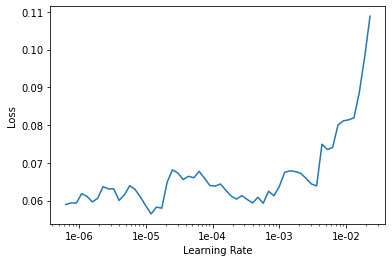

In [ ]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
#We save our model
learn.save('model2_34')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

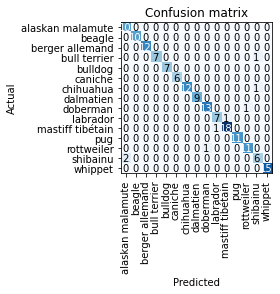

In [ ]:
#plot results of model on validation set 
interp.plot_confusion_matrix()

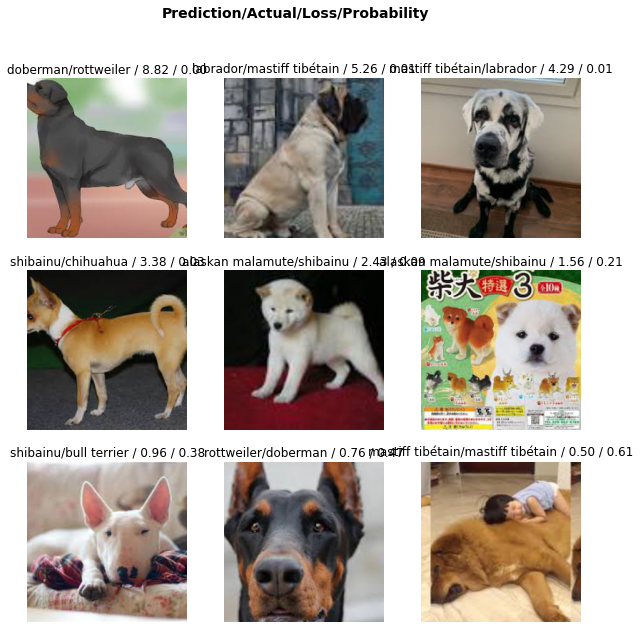

In [ ]:
#plot top losses
interp.plot_top_losses(9, figsize=(10,10))

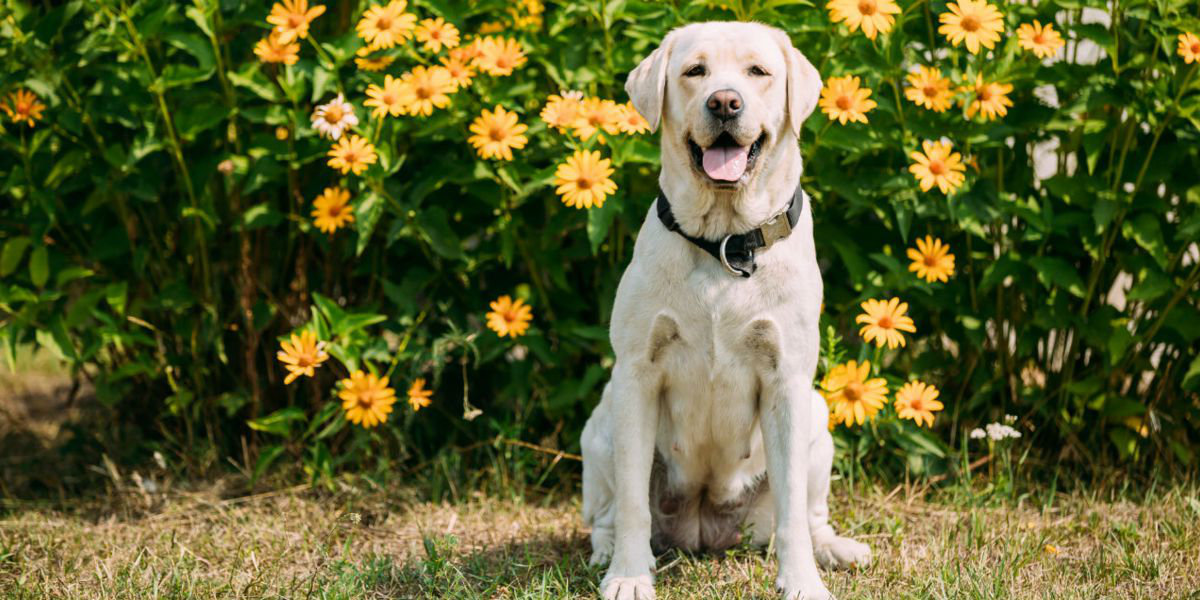

In [ ]:
#Here we try to predict picture outside of the set
img_labrador= open_image(Path(root_path)/'dogs_valid'/'Labrador.jpg')
img_labrador
#img_dalmatien= open_image(Path(root_path)/'dogs_valid'/'dalmatien.jpg')
#img_dalmatien
#img_shibainu= open_image(Path(root_path)/'dogs_valid'/'shibainu.jpg')
#img_shibainu

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img_labrador)
print(pred_class)

labrador
